## Loan Approval Project

### ***Problem Statement***: Developed a machine learning model to predict the loan amount that a customer is eligible for. The model was able to predict the loan amount with an good accuracy .

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Load Dataset

In [2]:
import pandas as pd

training = pd.read_csv('/content/training_set (1).csv')
testing = pd.read_csv('/content/training_set (1).csv')

training.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
training.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [4]:
training.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Dropping Statistically insignificant columns

In [5]:
training = training.drop(labels=['Loan_ID'],axis=1)

#### Observed that Credit History has float64 object type need to convert to object

In [6]:
crd_hst = []
for i in range(len(training)):
    if training['Credit_History'][i]==1:
        crd_hst.append('Yes')
    elif training['Credit_History'][i]==0:
        crd_hst.append('No')
    else:
        crd_hst.append(None)
training['Credit_History']=crd_hst

In [7]:
crd_hst1 = []
for i in range(len(testing)):
    if testing['Credit_History'][i]==1:
        crd_hst1.append('Yes')
    elif testing['Credit_History'][i]==0:
        crd_hst1.append('No')
    else:
        crd_hst1.append(None)
testing['Credit_History']=crd_hst1

In [8]:
training.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
testing.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

#### Checking for Missing Values in Training and Testing Dataset

In [10]:
training.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
testing.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Missing Data Treatment

In [12]:
def replacer(df):
    for i in df.columns:
        if df[i].dtypes == "object":
            x = df[i].mode()[0]
            df[i]=df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)
    print('Missing Values replaced in DataFrame')

In [13]:
replacer(training)
replacer(testing)

Missing Values replaced in DataFrame
Missing Values replaced in DataFrame


In [14]:
training.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
testing.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### **Exploratory Data Analysis**

#### Checking Correlation in continuous columns

In [16]:
training.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116625,0.565552,-0.045147
CoapplicantIncome,-0.116625,1.000000,0.187884,-0.059710
LoanAmount,0.565552,0.187884,1.000000,0.038801
Loan_Amount_Term,-0.045147,-0.059710,0.038801,1.000000


###Defining the function for seperation of categorical and continuous variable from dataset

In [17]:
def catcon(df):
    cat = []
    con = []
    for i in df.columns:
        if df[i].dtypes=="object":
            cat.append(i)
        else:
            con.append(i)
    print('Categorical and Continuous variables appended')
    return cat, con

### Defining function for performing ANOVA

In [18]:
def ANOVA(df,cat,con):
    from statsmodels.formula.api import ols
    eqn = str(con) + " ~ " + str(cat)
    model = ols(eqn,df).fit()
    from statsmodels.stats.anova import anova_lm
    Q = anova_lm(model)
    return round(Q.iloc[0:1,4:5].values[0][0],5)

### Seperating Categorical and Continuous variables

In [19]:
cat, con = catcon(training)

Categorical and Continuous variables appended


### Performing Anova of Loan Status with Continuous columns

In [20]:
q = []
for i in con:
    q.append(ANOVA(training,'Loan_Status',i))


In [21]:
pd.DataFrame({'Column':con,'pval':q})

,Column,pval
0,ApplicantIncome,0.90252
1,CoapplicantIncome,0.14239
2,LoanAmount,0.36769
3,Loan_Amount_Term,0.60396


#### None of value above has p-value less than 0.05

#### Performing ChiSquare Test of Loan Status with Categorical columns

In [22]:
def chisquare(df,cat1,cat2):
    import pandas as pd
    from scipy.stats import chi2_contingency
    a,b,c,d = chi2_contingency(pd.crosstab(df[cat1],df[cat2]))
    return b

In [23]:
Q = []
for i in cat:
    Q.append(chisquare(training,'Loan_Status',i))

In [24]:
dc=pd.DataFrame({'Columns':cat,'Pval':Q})
dc

,Columns,Pval
0,Gender,7.391461e-01
1,Married,2.960858e-02
2,Dependents,3.688663e-01
3,Education,4.309962e-02
4,Self_Employed,1.000000e+00
5,Credit_History,3.418350e-40
6,Property_Area,2.136019e-03
7,Loan_Status,1.544676e-134


In [25]:
imp_cat = list(dc[dc['Pval']<0.05].sort_values(by='Pval')['Columns'])
del imp_cat[0]

In [26]:
imp_cat

['Credit_History', 'Property_Area', 'Married', 'Education']

### **Defining X and Y**

In [27]:
X = training.drop(labels=['Loan_Status'],axis=1)
Y = training[['Loan_Status']]

#### **Preprocessing**

In [28]:
cat, con = catcon(X)
X1 = X[con]
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

Categorical and Continuous variables appended


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['Loan_Status']=le.fit_transform(Y)

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

### **Model 1 - Decision Tree**

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy")
model = dtc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  1.0
Testing Accuracy  :  0.6911
Training Recall   :  1.0
Testing Recall    :  0.7059


### **Pruning**

In [32]:
tr = []
ts = []
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=31,criterion="entropy",max_depth=i)
    model = dtc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(round(tr_acc,2))
    ts.append(round(ts_acc,2))

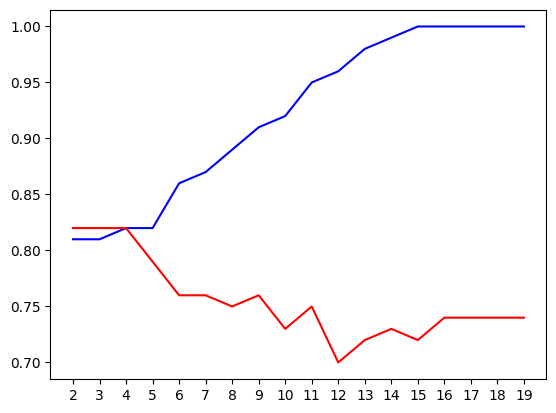

In [33]:
import matplotlib.pyplot as plt
r = range(2,20,1)
plt.plot(r,tr,c="blue")
plt.plot(r,ts,c="red")
plt.xticks(r)
plt.show()

### **Creating optimum model which has max_depth = 4**

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy",max_depth=4)
model = dtc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.8228
Testing Accuracy  :  0.8211
Training Recall   :  0.9941
Testing Recall    :  0.9647


In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ts_pred))

[[19 19]
 [ 3 82]]


### **Crossvalidation for Model 1**

In [36]:
tg = {"max_depth":range(2,20,1),"criterion":['gini','entropy']}
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=20)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [37]:
model1 = cvmodel.best_estimator_
pred = model1.predict(Xnew)
acc1 = accuracy_score(pred,Y)
rec1 = recall_score(pred,Y)
print('Accuracy : ',round(acc1,4))
print('Recall   : ',round(rec1,4))

Accuracy :  0.816
Recall   :  0.7965


In [38]:
print(confusion_matrix(pred,Y))

[[ 86   7]
 [106 415]]


In [39]:
Q = pd.DataFrame(Xnew.columns,columns=["col"])
Q['imp']=model1.feature_importances_

In [40]:
Q.sort_values(by=["imp"],ascending=False)

,col,imp
17,Credit_History_Yes,0.887584
1,CoapplicantIncome,0.049299
19,Property_Area_Semiurban,0.036449
2,LoanAmount,0.019762
0,ApplicantIncome,0.006906
12,Education_Graduate,0.000000
18,Property_Area_Rural,0.000000
16,Credit_History_No,0.000000
15,Self_Employed_Yes,0.000000
14,Self_Employed_No,0.000000


###**Model 2 : Random Forest**

***Train Test Split***

In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

### **Model Creation**

In [42]:
from sklearn.ensemble import RandomForestClassifier
tr = []
ts = []
for i in range(2,40,1):
    rfc = RandomForestClassifier(random_state=21,n_estimators=i)
    model = rfc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

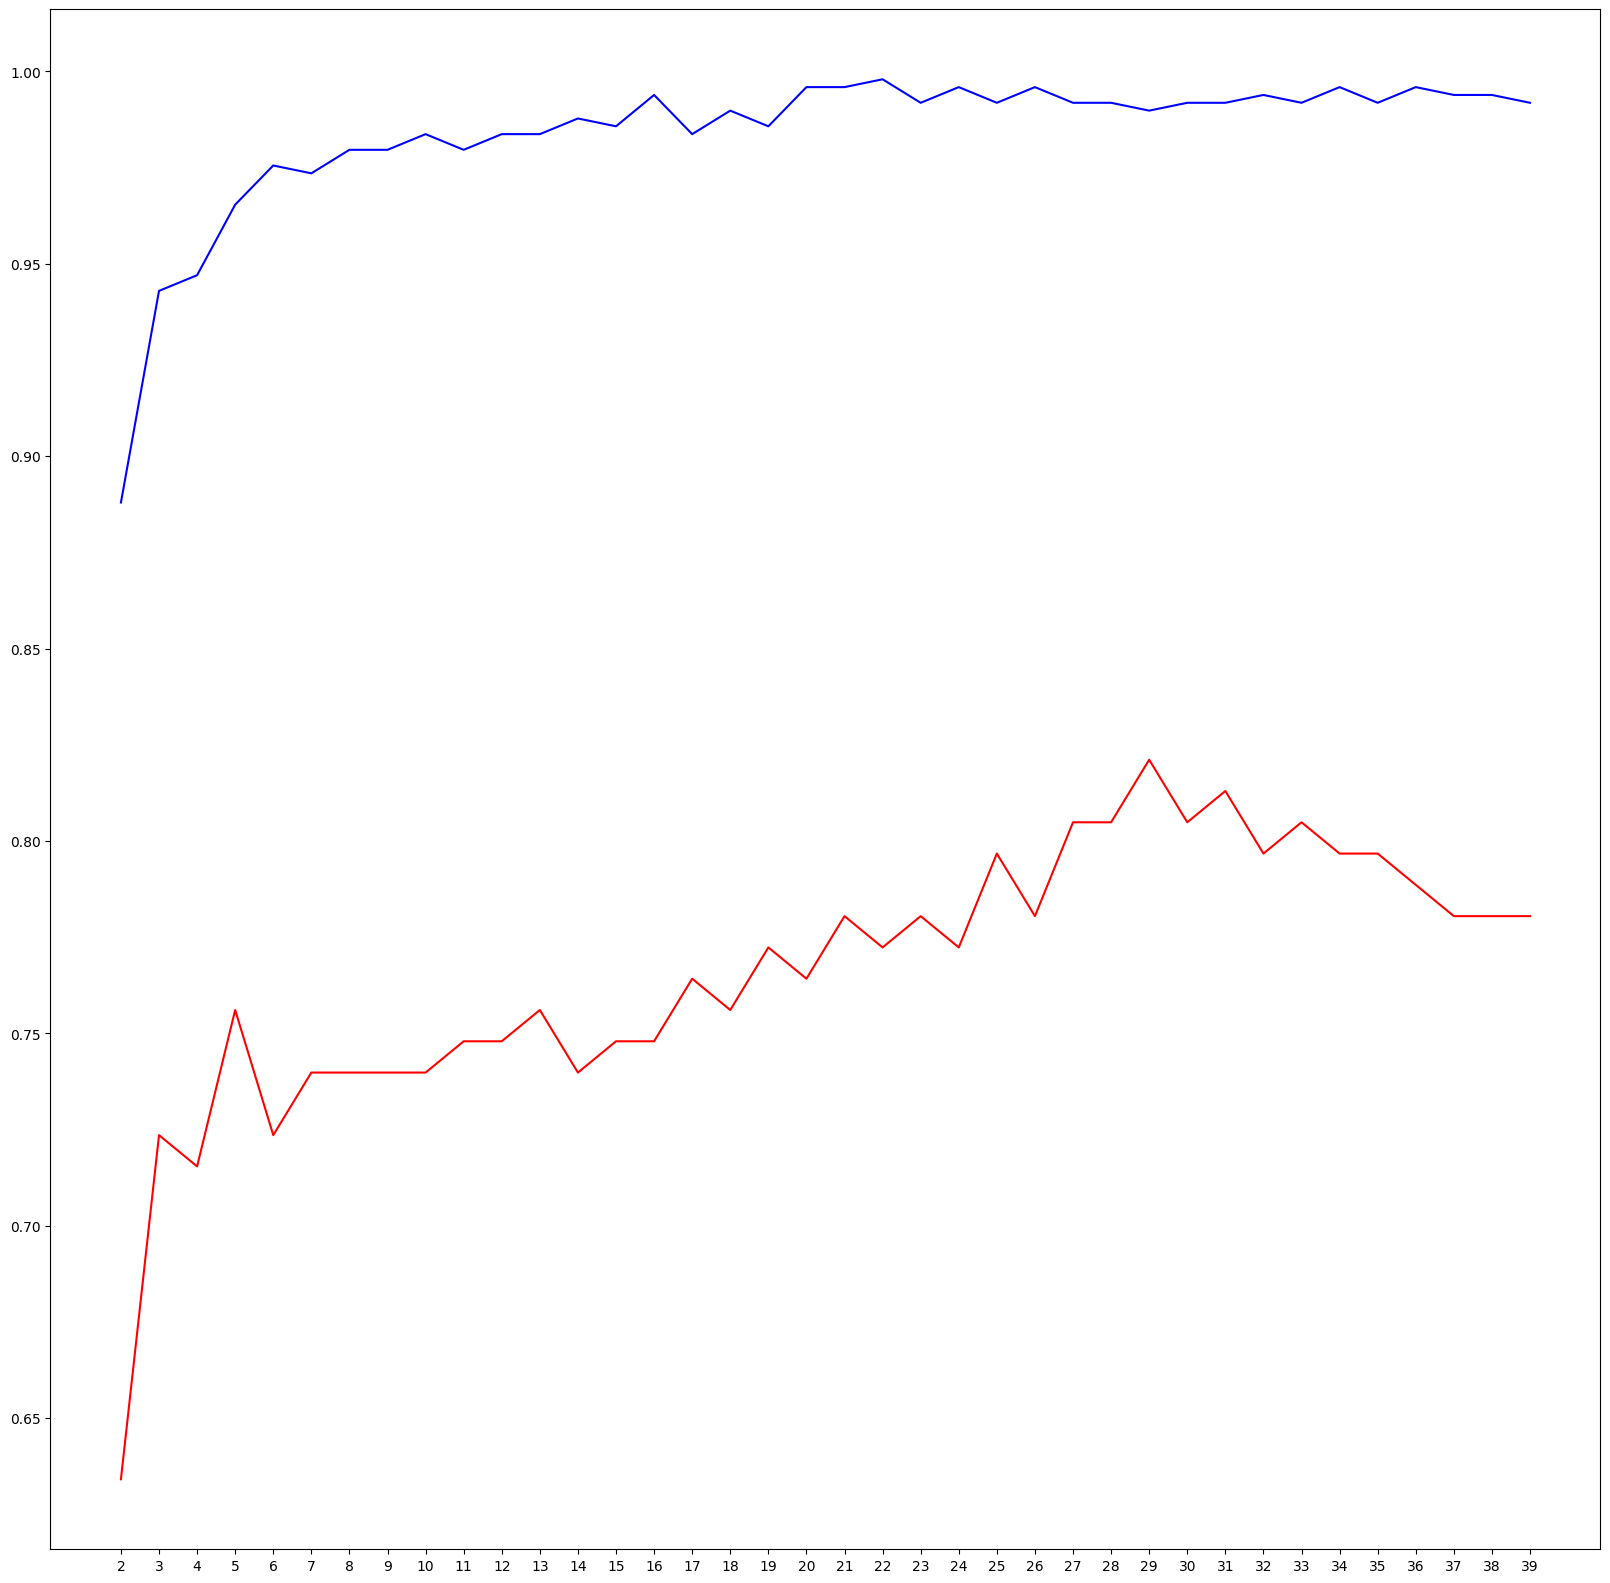

In [43]:
import matplotlib.pyplot as plt
r = range(2,40,1)
plt.figure(figsize=(20,20))
plt.plot(r,tr,c="blue")
plt.plot(r,ts,c="red")
plt.xticks(r)
plt.show()

### Creating Model with highest testing accurcy estimators=29

In [44]:
rfc = RandomForestClassifier(random_state=21,n_estimators=29)
model = rfc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.9898
Testing Accuracy  :  0.8211
Training Recall   :  1.0
Testing Recall    :  0.9059


In [45]:
print(confusion_matrix(ts_pred,ytest))

[[24  8]
 [14 77]]


## Cross Validation for Random Forest

In [46]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
tg = {"n_estimators":range(2,31,1),"max_depth":range(2,20),"criterion":['gini','entropy']}
cv = GridSearchCV(rfc,tg,scoring='accuracy',cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 8}

In [47]:
model2 = cvmodel.best_estimator_
pred = model2.predict(Xnew)
acc2 = accuracy_score(pred,Y)
rec2 = recall_score(pred,Y)
print('Accuracy : ',round(acc2,4))
print('Recall   : ',round(rec2,4))

Accuracy :  0.8208
Recall   :  0.8


In [48]:
print(confusion_matrix(pred,Y))

[[ 88   6]
 [104 416]]


In [49]:
Q = pd.DataFrame(Xnew.columns,columns=["col"])
Q['imp']=model2.feature_importances_

In [50]:
Q.sort_values(by=["imp"],ascending=False)

,col,imp
16,Credit_History_No,0.353017
17,Credit_History_Yes,0.258027
2,LoanAmount,0.087557
0,ApplicantIncome,0.071386
3,Loan_Amount_Term,0.041107
9,Dependents_1,0.028049
1,CoapplicantIncome,0.026510
6,Married_No,0.016991
19,Property_Area_Semiurban,0.015363
13,Education_Not Graduate,0.014270


### Model 2a : Random forest with Min_sample_leaf pruning

In [51]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
tg = {"n_estimators":range(2,31,1),"min_samples_leaf":range(2,20,1),"criterion":['gini','entropy']}
cv = GridSearchCV(rfc,tg,scoring='accuracy',cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 9, 'n_estimators': 4}

In [52]:
model_2a = cvmodel.best_estimator_
pred = model_2a.predict(Xnew)
acc_2a = accuracy_score(pred,Y)
rec_2a = recall_score(pred,Y)
print('Accuracy : ',round(acc_2a,4))
print('Recall   : ',round(rec_2a,4))

Accuracy :  0.8208
Recall   :  0.8023


### Model 2b : Random forest pruning with min_sample_split

In [53]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
tg = {"n_estimators":range(2,31,1),"min_samples_split":range(2,20,1),"criterion":['gini','entropy']}
cv = GridSearchCV(rfc,tg,scoring='accuracy',cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'gini', 'min_samples_split': 16, 'n_estimators': 7}

In [54]:
model_2b= cvmodel.best_estimator_
pred = model_2b.predict(Xnew)
acc_2b = accuracy_score(pred,Y)
rec_2b = recall_score(pred,Y)
print('Accuracy : ',round(acc_2b,4))
print('Recall   : ',round(rec_2b,4))

Accuracy :  0.855
Recall   :  0.8433


In [55]:
Q = pd.DataFrame(Xnew.columns,columns=["col"])
Q['imp']=model_2b.feature_importances_

In [56]:
Q.sort_values(by=["imp"],ascending=False)

,col,imp
16,Credit_History_No,0.327826
17,Credit_History_Yes,0.158441
0,ApplicantIncome,0.132284
2,LoanAmount,0.107462
1,CoapplicantIncome,0.056706
3,Loan_Amount_Term,0.040993
19,Property_Area_Semiurban,0.025011
8,Dependents_0,0.019732
7,Married_Yes,0.019198
12,Education_Graduate,0.018202


### Model 3 Adaboost

 Test Train Split

In [57]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

Model creation

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)
tr = []
ts = []
for i in range(2,40):
    abc = AdaBoostClassifier(dtc,n_estimators=i)
    model = abc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

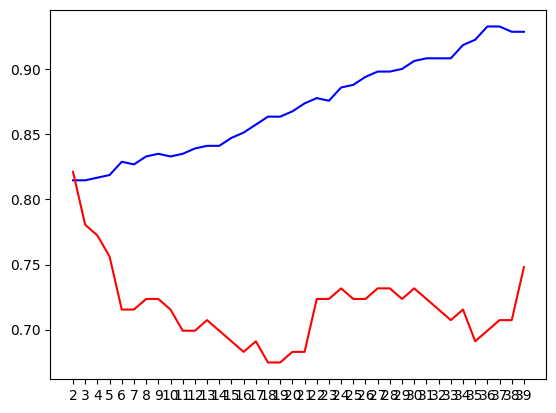

In [59]:
import matplotlib.pyplot as plt
r = range(2,40,1)
plt.plot(r,tr,c="blue")
plt.plot(r,ts,c="red")
plt.xticks(r)
plt.show()

creating best model with estimators = 2

In [60]:
abc = AdaBoostClassifier(dtc,n_estimators=2)
model = abc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.8147
Testing Accuracy  :  0.8211
Training Recall   :  0.9881
Testing Recall    :  0.9647


In [61]:
print(confusion_matrix(ts_pred,ytest))

[[19  3]
 [19 82]]



Cross Validation for Adaboost

In [62]:
from sklearn.model_selection import GridSearchCV
abc = AdaBoostClassifier(dtc)

tg = {'n_estimators':range(2,31,1)}
cv = GridSearchCV(abc,tg,scoring='accuracy',cv=20)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_estimators': 2}

In [63]:
model3 = cvmodel.best_estimator_
pred = model3.predict(Xnew)
acc3 = accuracy_score(pred,Y)
rec3 = recall_score(pred,Y)
print('Accuracy : ',round(acc3,4))
print('Recall   : ',round(rec3,4))

Accuracy :  0.816
Recall   :  0.7965


In [64]:
Q = pd.DataFrame(Xnew.columns,columns=["col"])
Q['imp']=model3.feature_importances_

In [65]:
Q.sort_values(by=["imp"],ascending=False)

,col,imp
17,Credit_History_Yes,0.468204
19,Property_Area_Semiurban,0.273382
2,LoanAmount,0.156440
1,CoapplicantIncome,0.101975
0,ApplicantIncome,0.000000
12,Education_Graduate,0.000000
18,Property_Area_Rural,0.000000
16,Credit_History_No,0.000000
15,Self_Employed_Yes,0.000000
14,Self_Employed_No,0.000000


### Model 4 : KNN

###Scaling the data with Standard Scaler

In [66]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X11 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [67]:
X21= pd.get_dummies(X[cat])
Xnew2 = X11.join(X21)

Test Train Split

In [68]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew2,Y,test_size=0.2,random_state=21)

Model Creation¶

In [69]:
from sklearn.neighbors import KNeighborsClassifier
tr = []
ts = []
for i in range(2,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

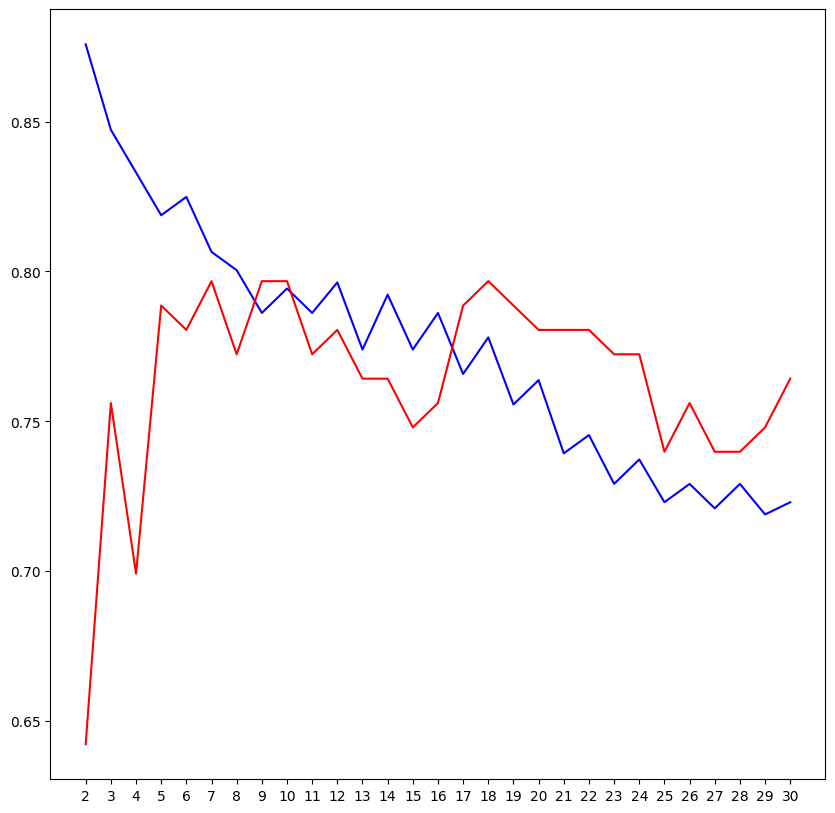

In [70]:
import matplotlib.pyplot as plt
r = range(2,31,1)
plt.figure(figsize=(10,10))
plt.plot(r,tr,c="blue")
plt.plot(r,ts,c="red")
plt.xticks(r)
plt.show()

In [71]:
max(ts)

0.7967479674796748

Creating model with 18 neighbours

In [72]:
knn = KNeighborsClassifier(n_neighbors=18)
model = knn.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.778
Testing Accuracy  :  0.7967
Training Recall   :  0.9941
Testing Recall    :  0.9765


KNN Cross validation

In [73]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

tg = {"n_neighbors":range(2,31,1)}
cv = GridSearchCV(knn,tg,scoring='accuracy',cv=20)
cvmodel = cv.fit(Xnew2,Y)
cvmodel.best_params_

{'n_neighbors': 16}

In [74]:
model4 = cvmodel.best_estimator_
pred = model3.predict(Xnew2)
acc4 = accuracy_score(pred,Y)
rec4 = recall_score(pred,Y)
print('Accuracy : ',round(acc4,4))
print('Recall   : ',round(rec4,4))

Accuracy :  0.8094
Recall   :  0.7905


Checking Accuracy Score and Recall for each cross validated model

In [75]:
score = {'Algorithm':['Decision Tree','Random Forest Max Depth','Random Forest Min Sample Leaf','Random Forest Min Sample Split','Adaboost','KNN'],
         'Accuracy':[acc1,acc2,acc_2a,acc_2b,acc3,acc4],
         'Recall':[rec1,rec2,rec_2a,rec_2b,rec3,rec4],
         'Model Number':['1','2','2a','2b','3','4']}
s = pd.DataFrame(score)

s

,Algorithm,Accuracy,Recall,Model Number
0,Decision Tree,0.815961,0.796545,1
1,Random Forest Max Depth,0.820847,0.800000,2
2,Random Forest Min Sample Leaf,0.820847,0.802326,2a
3,Random Forest Min Sample Split,0.855049,0.843299,2b
4,Adaboost,0.815961,0.796545,3
5,KNN,0.809446,0.790476,4


### Above Results Show that Model 2b : Random Forest with Max Split is better than other models

Using Model 2b : random forest Max Split to predict Testing sheet

In [76]:
testing2 = testing.drop(labels='Loan_ID',axis=1)
cat2, con2 =catcon(testing2)

Categorical and Continuous variables appended


In [77]:
Xts1 = testing2[con2]
Xts2 = pd.get_dummies(testing2[cat2])
XtsNew = Xts1.join(Xts2)

In [78]:
XtsNew.shape

(614, 23)

In [79]:
XtsNew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_No',
       'Credit_History_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [80]:
Xnew.shape

(614, 21)

In [81]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_No',
       'Credit_History_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [84]:
TestPredictions = model_2b.predict(Xnew)
TestPredictions = le.inverse_transform(TestPredictions)
TestPredictionsDF = pd.DataFrame({'Loan_ID':testing['Loan_ID'],'Loan_Status_Predicted':TestPredictions})
TestPredictionsDF

,Loan_ID,Loan_Status_Predicted
0,LP001002,Y
1,LP001003,Y
2,LP001005,Y
3,LP001006,Y
4,LP001008,Y
...,...,...
609,LP002978,Y
610,LP002979,Y
611,LP002983,Y
612,LP002984,Y


In [85]:
TestPredictionsDF.groupby(by='Loan_Status_Predicted').count()

,Loan_ID
Loan_Status_Predicted,
N,129
Y,485


In [86]:
TestPredictionsDF.to_csv('./TestPredictions.csv')